1. Loading the dataset and importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Preeti Khamkar\OneDrive\Desktop\AIDS Lab\weatherHistory - Copy.csv')
df.dropna(inplace=True)
df.head()

,Formatted_Date,Summary,Precip_Type,Temperature (C),Apparent_Temperature_C,Humidity,Visibility (km),Pressure (millibars),Daily Summary
0,2006-02-01 00:00:00.000 +0100,Overcast,snow,-2.144444,-6.200000,0.86,4.8300,1025.18,Mostly cloudy until night.
1,2006-02-01 01:00:00.000 +0100,Overcast,snow,-2.466667,-4.322222,0.89,3.8962,1023.23,Mostly cloudy until night.
2,2006-02-01 02:00:00.000 +0100,Overcast,snow,-2.744444,-2.744444,0.89,4.3631,1025.19,Mostly cloudy until night.
3,2006-02-01 03:00:00.000 +0100,Overcast,snow,-2.188889,-2.188889,0.88,4.3631,1025.25,Mostly cloudy until night.
4,2006-02-01 04:00:00.000 +0100,Overcast,snow,-2.038889,-2.038889,0.87,4.7334,1024.88,Mostly cloudy until night.


2. Determining the independent features as X and dependent features as y

In [3]:
x = df[['Temperature (C)', 'Apparent_Temperature_C', 'Humidity', 'Visibility (km)', 'Pressure (millibars)']]
y = df['Summary']

3. Giving unique values to each category

In [4]:
df['Summary'].unique()

array(['Overcast', 'Foggy', 'Mostly Cloudy', 'Partly Cloudy', 'Clear',
       'Breezy and Mostly Cloudy'], dtype=object)

In [5]:
df['Summary'].replace(['Overcast', 'Foggy', 'Mostly Cloudy', 'Partly Cloudy', 'Clear',
       'Breezy and Mostly Cloudy'], [1,2,3,4,5,6], inplace=True)

df.head()

,Formatted_Date,Summary,Precip_Type,Temperature (C),Apparent_Temperature_C,Humidity,Visibility (km),Pressure (millibars),Daily Summary
0,2006-02-01 00:00:00.000 +0100,1,snow,-2.144444,-6.200000,0.86,4.8300,1025.18,Mostly cloudy until night.
1,2006-02-01 01:00:00.000 +0100,1,snow,-2.466667,-4.322222,0.89,3.8962,1023.23,Mostly cloudy until night.
2,2006-02-01 02:00:00.000 +0100,1,snow,-2.744444,-2.744444,0.89,4.3631,1025.19,Mostly cloudy until night.
3,2006-02-01 03:00:00.000 +0100,1,snow,-2.188889,-2.188889,0.88,4.3631,1025.25,Mostly cloudy until night.
4,2006-02-01 04:00:00.000 +0100,1,snow,-2.038889,-2.038889,0.87,4.7334,1024.88,Mostly cloudy until night.


4. Splitting the dataset into train and test datasets and then standardizing the values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

__K-Nearest Neighbour (KNN) Algorithm__

1. Finding the best value of n_neighbour

X-coordinate of the minima: 2


<Axes: >

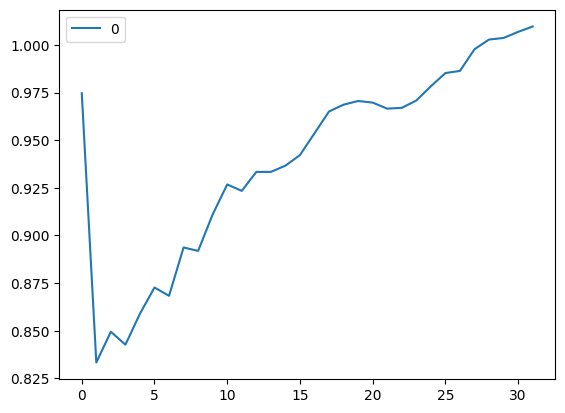

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

#To store rmse values for different k
rmse_val = []
for K in range(32):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)

min_rmse_index = rmse_val.index(min(rmse_val))
print("X-coordinate of the minima:", min_rmse_index + 1)

#Plot rmse values against the K values
curve = pd.DataFrame(rmse_val)
curve.plot()

2. Model implementation

In [9]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

3. Model Evaluation

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[34  2  6  0  0]
 [ 0 12  0  0  0]
 [ 8  0 42  5  0]
 [ 1  0 32 23  2]
 [ 1  1  0  4  7]]


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6555555555555556


In [12]:
data = pd.DataFrame({'Actual Status':y_test, 'Predicted Status':y_pred})
print(data)

     Actual Status  Predicted Status
340              3                 3
290              4                 1
54               2                 2
198              5                 5
453              1                 1
..             ...               ...
182              4                 4
506              5                 4
29               1                 2
204              4                 4
701              3                 3

[180 rows x 2 columns]


4. Prediction

In [13]:
feat = np.array([-2.144, -6.2, 0.86, 4.83, 1025.18])
feat = feat.reshape(1, -1)
print("Predicted: {}".format(classifier.predict(feat)))

Predicted: [1]


**Support Vector Machine (SVM)**

1. Model Implementation

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

2. Model Evaluation

In [15]:
y_svm_pred = svm.predict(X_test)

# from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_svm_pred)
print(cm_svm)
print('Accuracy: ', accuracy_score(y_test, y_svm_pred))

[[28  0  9  4  1]
 [ 1 11  0  0  0]
 [ 4  0 32 17  2]
 [ 5  0 25 25  3]
 [ 8  0  1  1  3]]
Accuracy:  0.55


3. Prediction

In [16]:
feat = np.array([-2.144, -6.2, 0.86, 4.83, 1025.18])
feat = feat.reshape(1, -1)
print("Predicted: {}".format(svm.predict(feat)))

Predicted: [5]


**Decision Tree Classifier**

1. Model Implementation

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

2. Model Evaluation

In [18]:
y_pred = clf.predict(X_test)

df = pd.DataFrame(y_test, y_pred)
df = pd.DataFrame({"Actual Summary":y_test, "Predicted Summary":y_pred})

print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
df

Accuracy:  53.888888888888886


,Actual Summary,Predicted Summary
340,3,4
290,4,1
54,2,2
198,5,4
453,1,3
...,...,...
182,4,4
506,5,4
29,1,1
204,4,4


3. Prediction

In [19]:
feat = np.array([-2.144, -6.2, 0.86, 4.83, 1025.18])
feat = feat.reshape(1, -1)
print("Predicted: {}".format(clf.predict(feat)))

Predicted: [1]


**Naive Bayes**

_1. Gaussian Naive Bayes_

a. Model Implementation

In [20]:
from sklearn.naive_bayes import GaussianNB
gaussClf = GaussianNB()
gaussClf.fit(X_train, y_train)

GaussianNB()

b. Model Evaluation

In [21]:
y_pred = gaussClf.predict(X_test)
print("Accuracy:", accuracy_score(y_pred, y_test)*100)

df = pd.DataFrame(y_test, y_pred)
df = pd.DataFrame({"Actual Summary":y_test, "Predicted Summary":y_pred})
df

Accuracy: 49.44444444444444


,Actual Summary,Predicted Summary
340,3,5
290,4,1
54,2,2
198,5,1
453,1,3
...,...,...
182,4,4
506,5,1
29,1,2
204,4,4


c. Prediction

In [22]:
feat = np.array([-2.144, -6.2, 0.86, 4.83, 1025.18])
feat = feat.reshape(1, -1)
print("Predicted: {}".format(gaussClf.predict(feat)))

Predicted: [1]


_2. Bernoulli Naive Bayes_

a. Model Implementation

In [23]:
from sklearn.naive_bayes import BernoulliNB
bernClf = BernoulliNB()
bernClf.fit(X_train, y_train)

BernoulliNB()

b. Model Evaluation

In [24]:
y_pred = bernClf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

df = pd.DataFrame(y_test, y_pred)
df = pd.DataFrame({"Actual Summary":y_test, "Predicted Summary":y_pred})
df

Accuracy:  40.55555555555556


,Actual Summary,Predicted Summary
340,3,5
290,4,1
54,2,2
198,5,2
453,1,3
...,...,...
182,4,4
506,5,2
29,1,2
204,4,4


c. Prediction

In [25]:
feat = np.array([-2.144, -6.2, 0.86, 4.83, 1025.18])
feat = feat.reshape(1, -1)
print("Predicted: {}".format(gaussClf.predict(feat)))

Predicted: [1]


_3. Multinomial Naive Bayes_

a. Model Implementation

In [26]:
from sklearn.naive_bayes import MultinomialNB
multiClf = MultinomialNB()
multiClf.fit(X_train, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

b. Model Evaluation

In [ ]:
y_pred = multiClf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred)*100)

df = pd.DataFrame(y_test, y_pred)
df = pd.DataFrame({"Actual Summary":y_test, "Predicted Summary":y_pred})
df

c. Prediction

In [ ]:
feat = np.array([-2.144, -6.2, 0.86, 4.83, 1025.18])
feat = feat.reshape(1, -1)
print("Predicted: {}".format(multiClf.predict(feat)))

**Random Forest**